# Grafo

# Explicación de grafos

Un grafo G se define como G = (V, E), donde:
- V es el conjunto de vértices (nodos).
- E es el conjunto de aristas (arcos) que conectan pares de vértices.

Tipos principales:
- Dirigido vs No dirigido: en dirigido las aristas tienen sentido (u → v).
- Ponderado vs No ponderado: las aristas pueden tener un peso o costo.
- Simple vs Multigrafo: multigrafo permite múltiples aristas entre un mismo par.
- Conexo vs Disconexo: si existe camino entre cualquier par de vértices.

Representaciones comunes:
- Lista de adyacencia: para cada vértice, lista de vecinos (eficiente en espacio).
- Matriz de adyacencia: matriz booleana o numérica (acceso O(1) para comprobar arista).
- Lista de aristas: útil para algoritmos como Kruskal.

Algoritmos y operaciones frecuentes:
- Recorridos: BFS (anchura), DFS (profundidad).
- Caminos mínimos: Dijkstra (pesos no negativos), Bellman–Ford (con negativos), Floyd–Warshall (todas las parejas).
- Árboles de expansión mínima: Prim, Kruskal.
- Ordenación topológica (para DAGs), detección de ciclos, componentes conexas.

Ejemplo sencillo:
- V = {A, B, C}
- E = {(A, B), (B, C), (A, C)}

Aplicaciones típicas: redes sociales, enrutamiento y mapas, dependencias de tareas, modelado de relaciones y flujo.

A diferencia de las visualizaciones geográficas en un "grafo" los puntos no tienen una posición en el espacio. Es decir, no tenemos ejes de coordenadas. Simplemente tendremos los puntos, y como se conectan entre ellos. La importante de visualizar grafos es poder analizar como se conectan los vértices para detectar patrones, puntos de fallo, comunidades o vértices más importantes o centrales.

Otros nombres: Network, Red

Consejos 
* Puedo codificar una variable numérica o categórica relacionada a los vértices de las siguientes maneras: 
    *   Cambiando eI tamaño de los vertices para que dependa de una variable numérica 
    * Cambiando el color de los vertices para que la intensidad refleje una variable numérica. O que la tonalidad dependa de una variable categórica 
* Los grafos son una de las visualizaciones más difíciles de lograr ya que rápidamente se vuelven muy densas con una cantidad relativamente baja de puntos (ver imagen). Más aún si quiero mostrar las etiquetas en cada nodo. 
* Para mitigar 10 copado que puede llegar a verse un grafo, puedo utilizar las siguiente técnicas: 
    * Jugar con la opacidad de los nodos y ejes es muy importante. Incluso puedo hacer que dependa de alguna variable numérica 
    * Evitar mostrar todas las etiquetas de cada nodo 
    * Filtrar los nodos y ejes por una propiedad del grafo. Por ejemplo: 
        * Filtrar solo los nodos que tengan mas de cierto grado. 
        * Filtrar los nodos por una medida de centralidad mayor a cierto valor. 
        * Filtrar los ejes que tengan un peso mayor a cierto valor. 
    * Intentar con los diferentes algoritmos de disposición de grafos (más información: httpúyifanhu.net/PUB/ch16.pdf)
* Si los puntos existen bajo un contexto geográfico, preferiríamos graficar un Mapa de Conecciones o Flujo. Que es un grafo cuyos vertices poseen coordenadas y 10 podemos dibujar sobre de un mapa.

In [1]:
%pip install networkx

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 33.5 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
nodos = pd.read_csv('../data/nodes.csv')
nodos

,id,label,pagerank,community
0,Moonbasking,Moonbasking,0.595979,25769803776
1,Hettman,Hettman,0.762746,1219770712064
2,essexgirl,essexgirl,0.595979,25769803776
3,duanes,duanes,0.639164,910533066752
4,Georuff,Georuff,0.550180,781684047872
5,leadguitar,leadguitar,0.669611,1305670057984
6,Hossfly,Hossfly,0.595979,25769803776
7,GadflyM,GadflyM,0.706065,266287972352
8,TheDailyStir,TheDailyStir,0.550180,352187318273
9,DelilahMcIntosh,DelilahMcIntosh,0.669611,1305670057984


In [5]:
ejes = pd.read_csv('../data/edges.csv')
ejes

,src,dst,weight
0,Moonbasking,HiramHawk,1
1,brutuslaurentius,RealTrumpTweets,1
2,WaitWatchSee,OldeDutch,1
3,WaitWatchSee,DeplorableSpirit,1
4,PaesurBiey,DelilahMcIntosh,1
...,...,...,...
58,DeplorableSurfer,Hettman,1
59,TheDailyStir,RealTrumpTweets,1
60,bbeeaann,MadJewessWoman,1
61,Moonbasking,Hossfly,1


In [7]:
G = nx.from_pandas_edgelist(
    ejes,
    source='src',
    target='dst',
    edge_attr='weight',
)
G

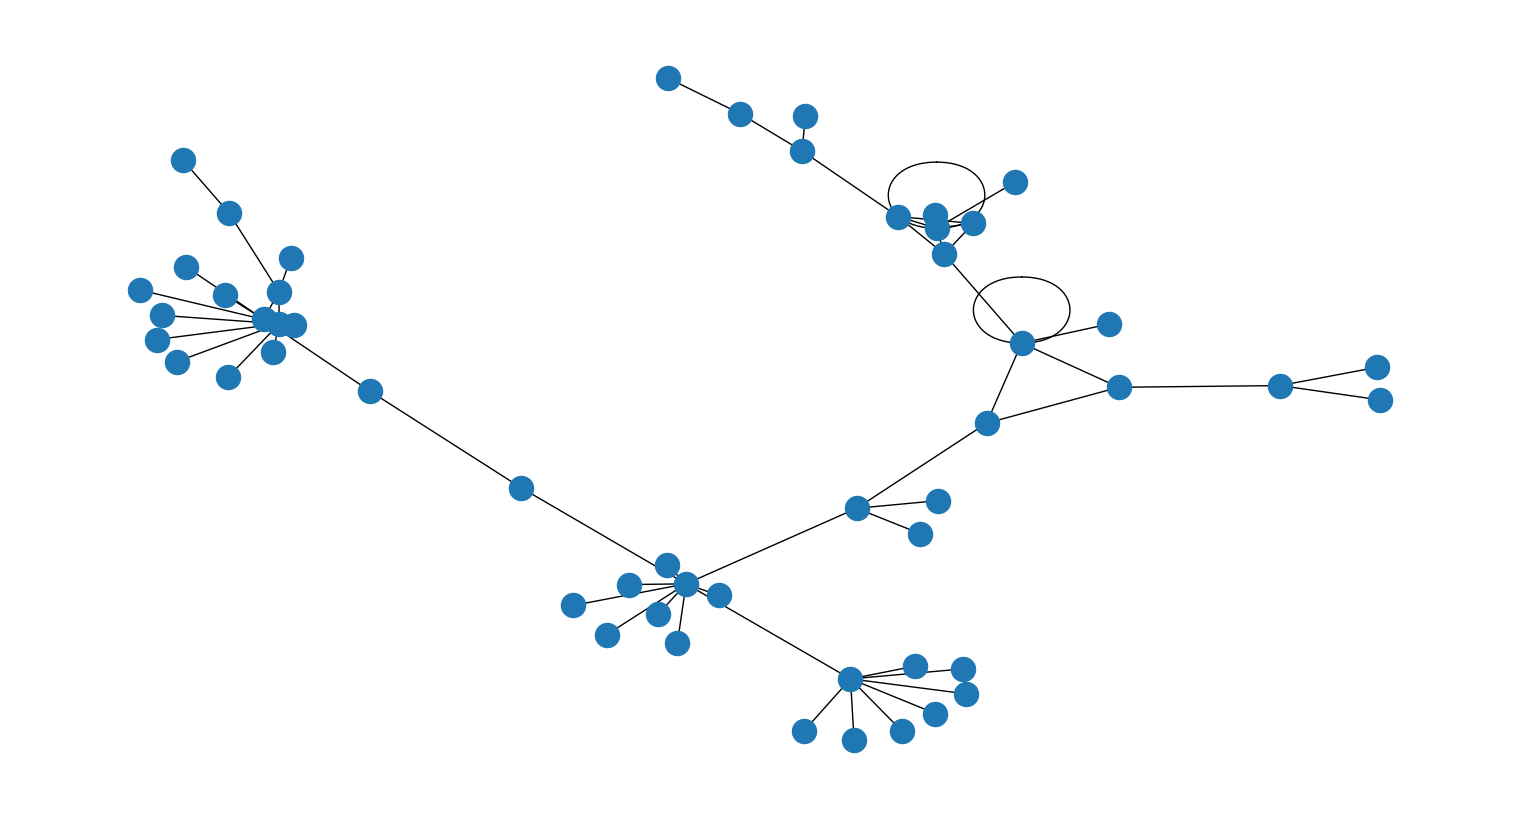

In [8]:
# Graficos con Network X
# https://networkx.org/documentation/stable/reference/drawing.html
plt.rcParams["figure.figsize"] = (15, 8)
nx.draw(G)

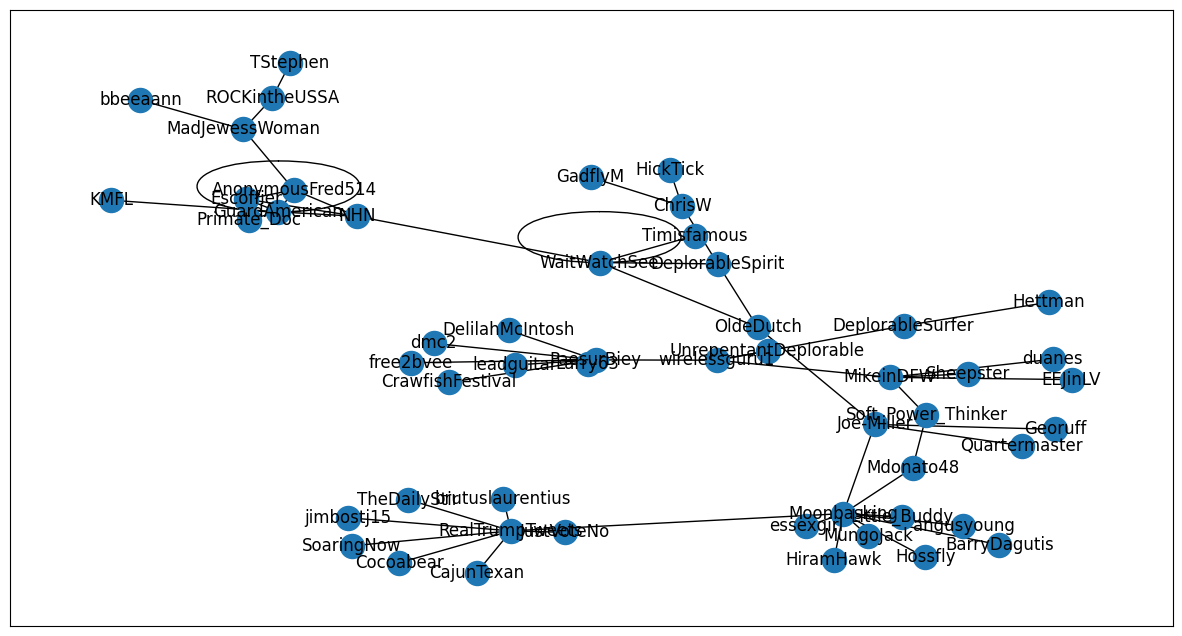

In [9]:
nx.draw_networkx(G)

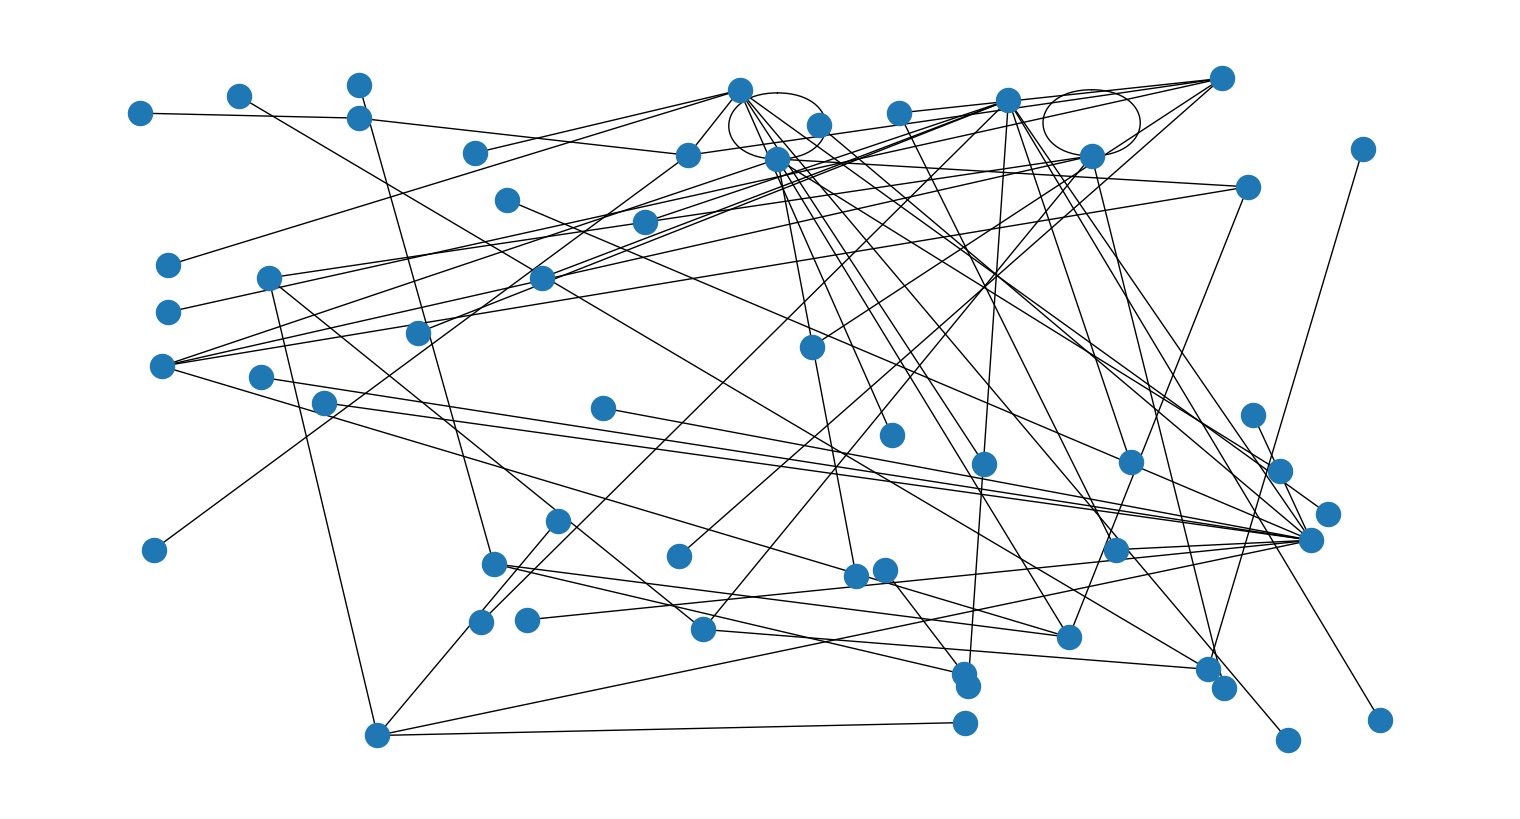

In [10]:
nx.draw_random(G)

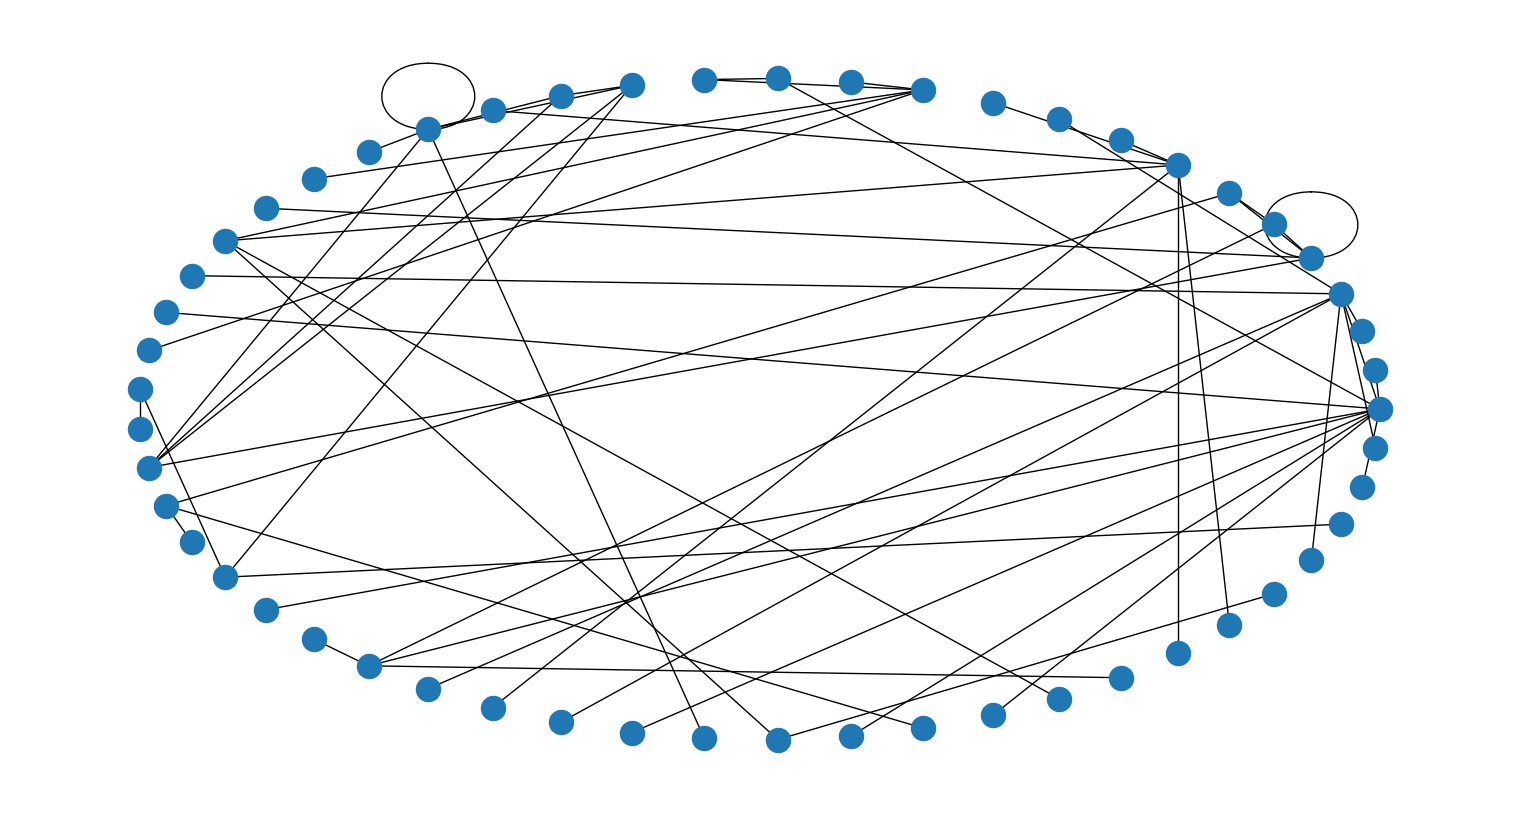

In [11]:
# Tambien se le denomina "Diagrama de Cuerdas sin Lazos"
nx.draw_circular(G)

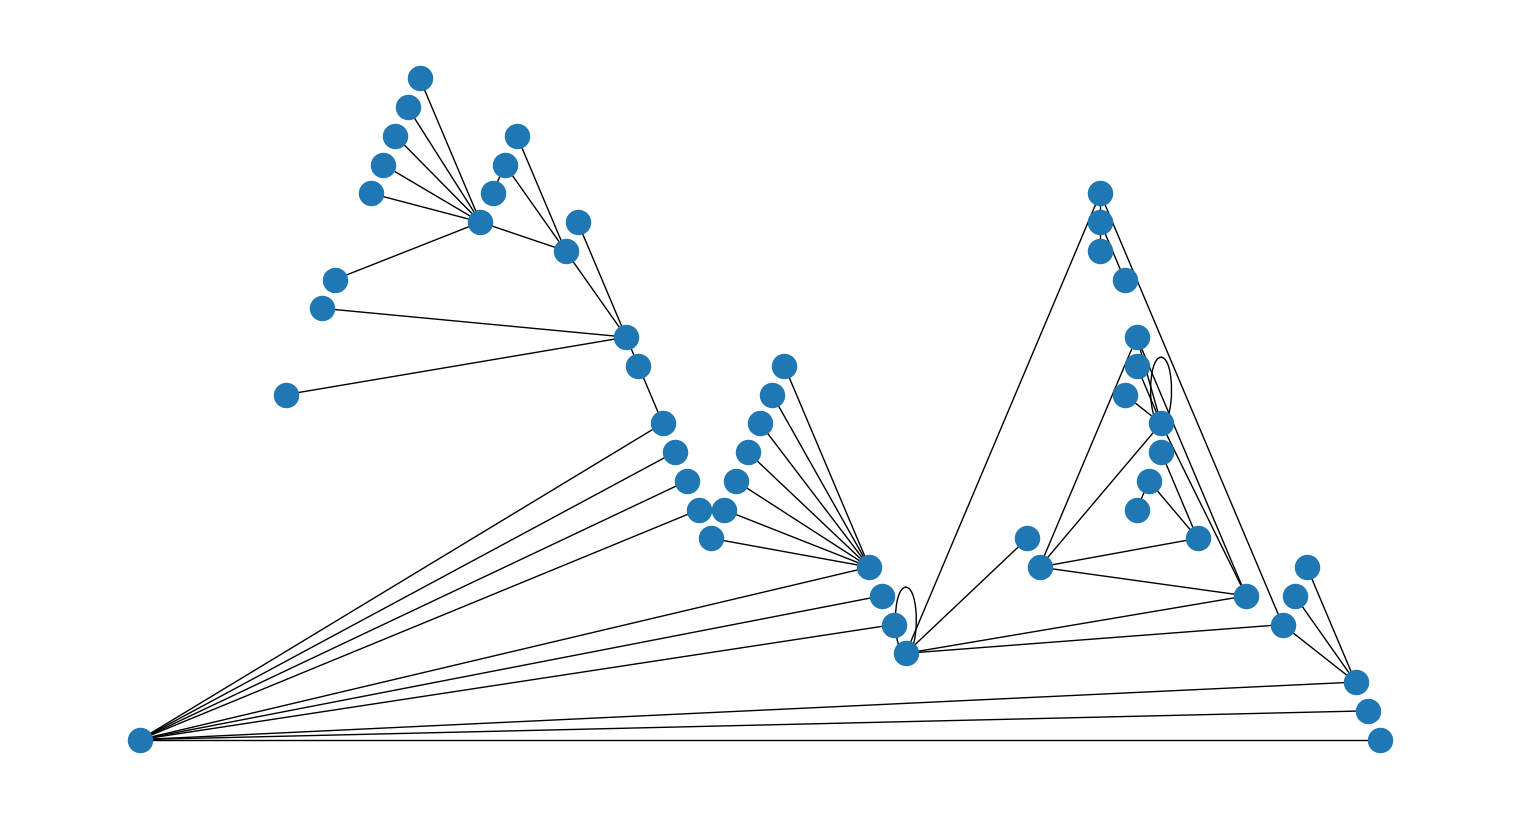

In [12]:
nx.draw_planar(G)

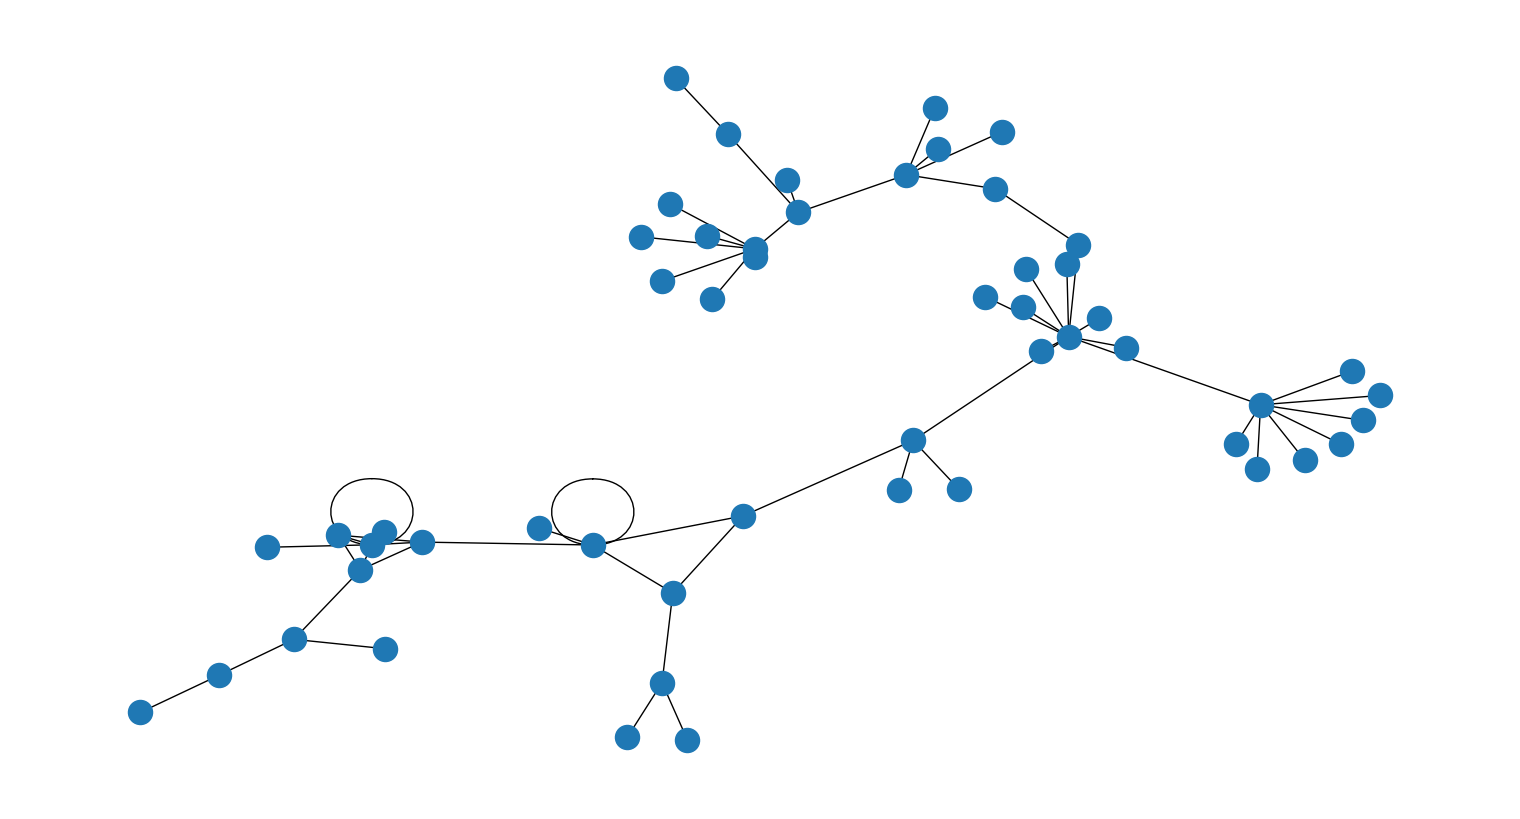

In [13]:
nx.draw_spring(G)

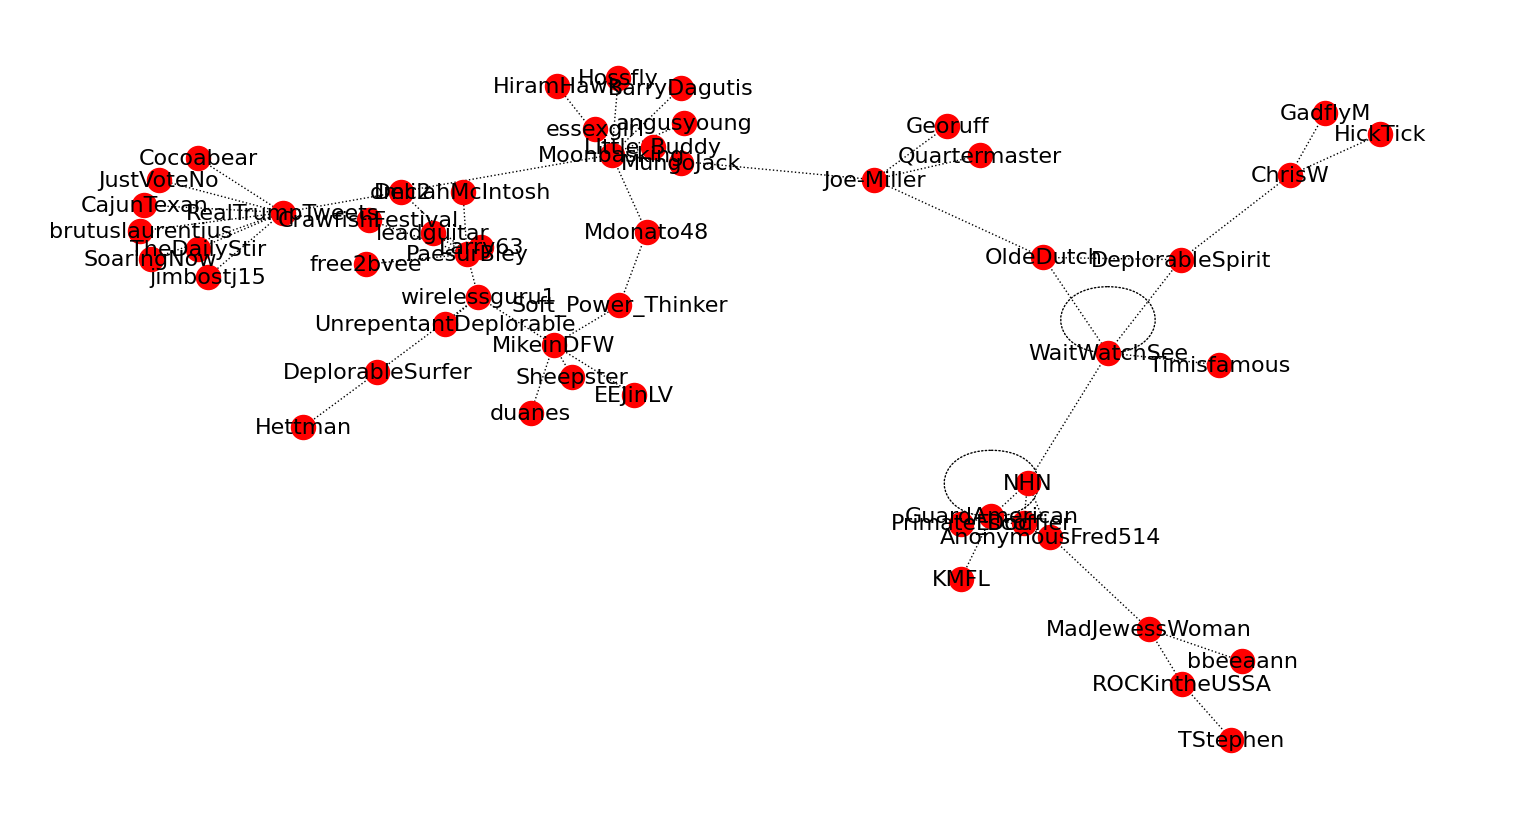

In [14]:
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
nx.draw_spring(
    G,
    with_labels=True,
    node_size=300,
    node_color='red',
    #alpha=0.5,
    width=1,
    style=':', # solid, dashed | mismos que matplotlib
    font_size=16,
)

## Algoritmos de Posicionamiento de NetworkX
* Circular: Posiciona los nodos en un circulo nx.draw_circular(G)
* Random: Posiciona los nodos de forma aleatoria nx.draw_random(G)
* Shell: Posiciona los nodos en circulos concentricos nx.draw_shell(G)
* Spring: Posiciona los nodos utilizando el algoritmo Fruchterman-Reingold nx.draw_spring(G)
* Spectral: Posiciona los nodos utilizando una medida de importancia de los nodos (eigen vector) nx.draw_spectral(G)

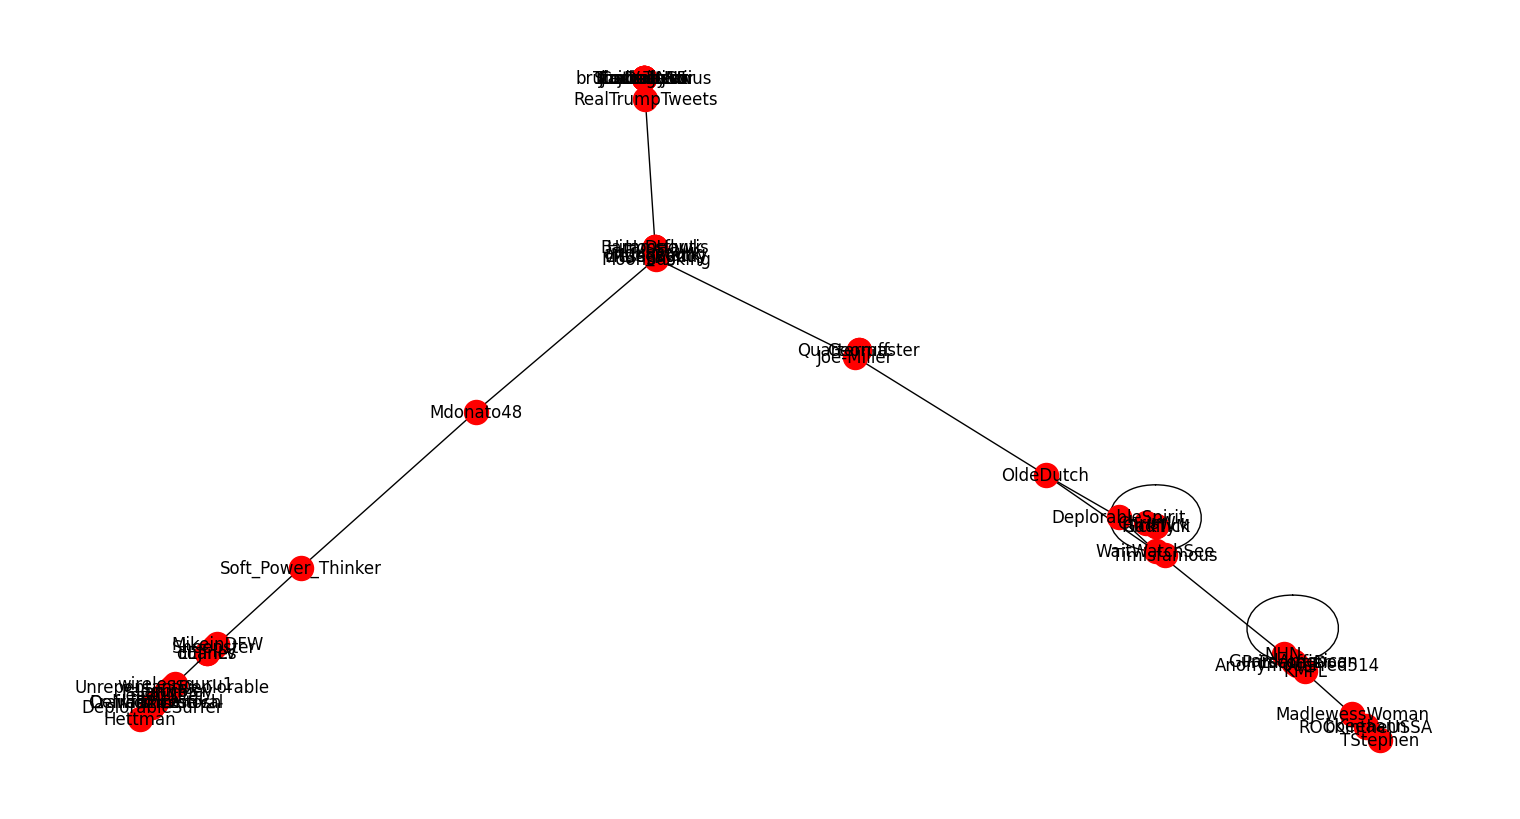

In [15]:
# Los nodos mas importantes estaran arriba, los nodos menos importantes abajo
nx.draw_spectral(
    G,
    with_labels=True,
    node_size=300,
    node_color='red',
    #alpha=0.5,
    width=1
)

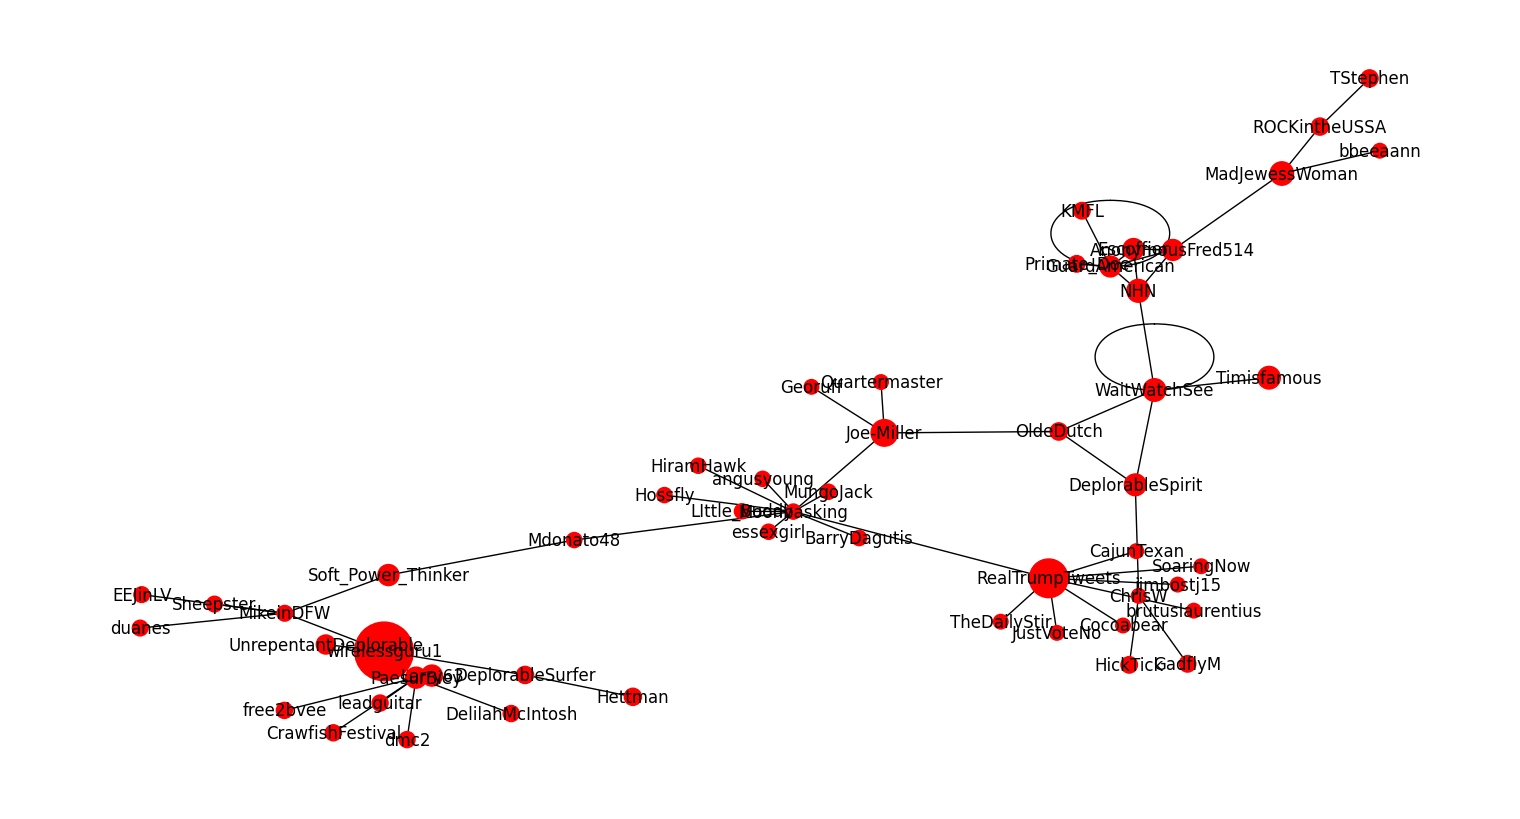

In [16]:
# Con tamaño variable dependiendo de atributo numérico de los nodos
nx.draw_spring(
    G,
    with_labels=True,
    nodelist=list(nodos['id']),
    node_size=list(nodos['pagerank'] * 200),
    node_color='red'
)

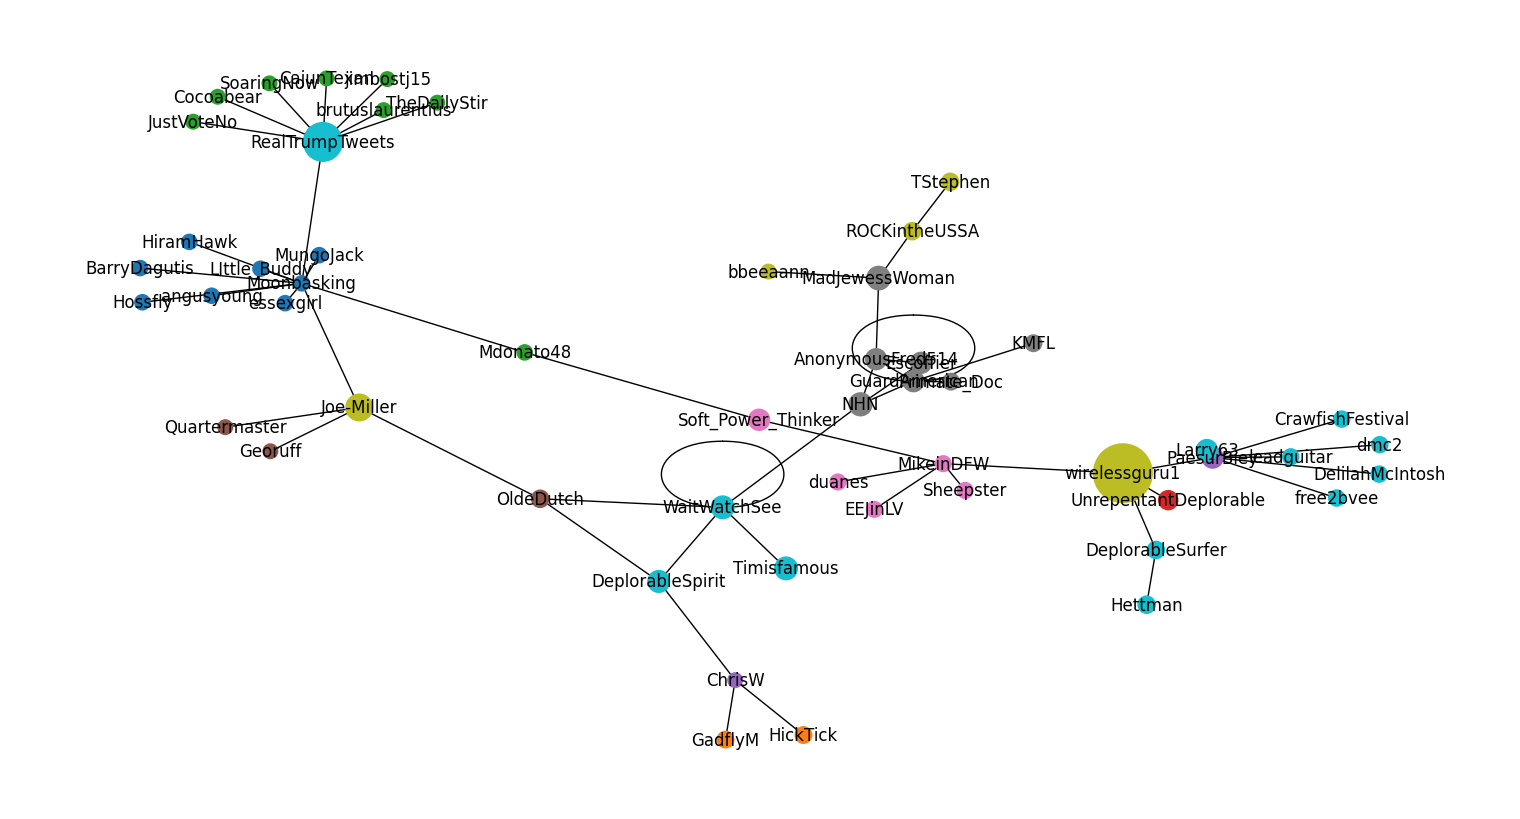

In [17]:
# Con tamaño y color variable dependiendo de atributo numérico de los nodos
nx.draw_spring(
    G,
    with_labels=True,
    nodelist=list(nodos['id']),
    node_size=list(nodos['pagerank'] * 200),
    node_color=list(nodos['community']),
    cmap='tab10'
)

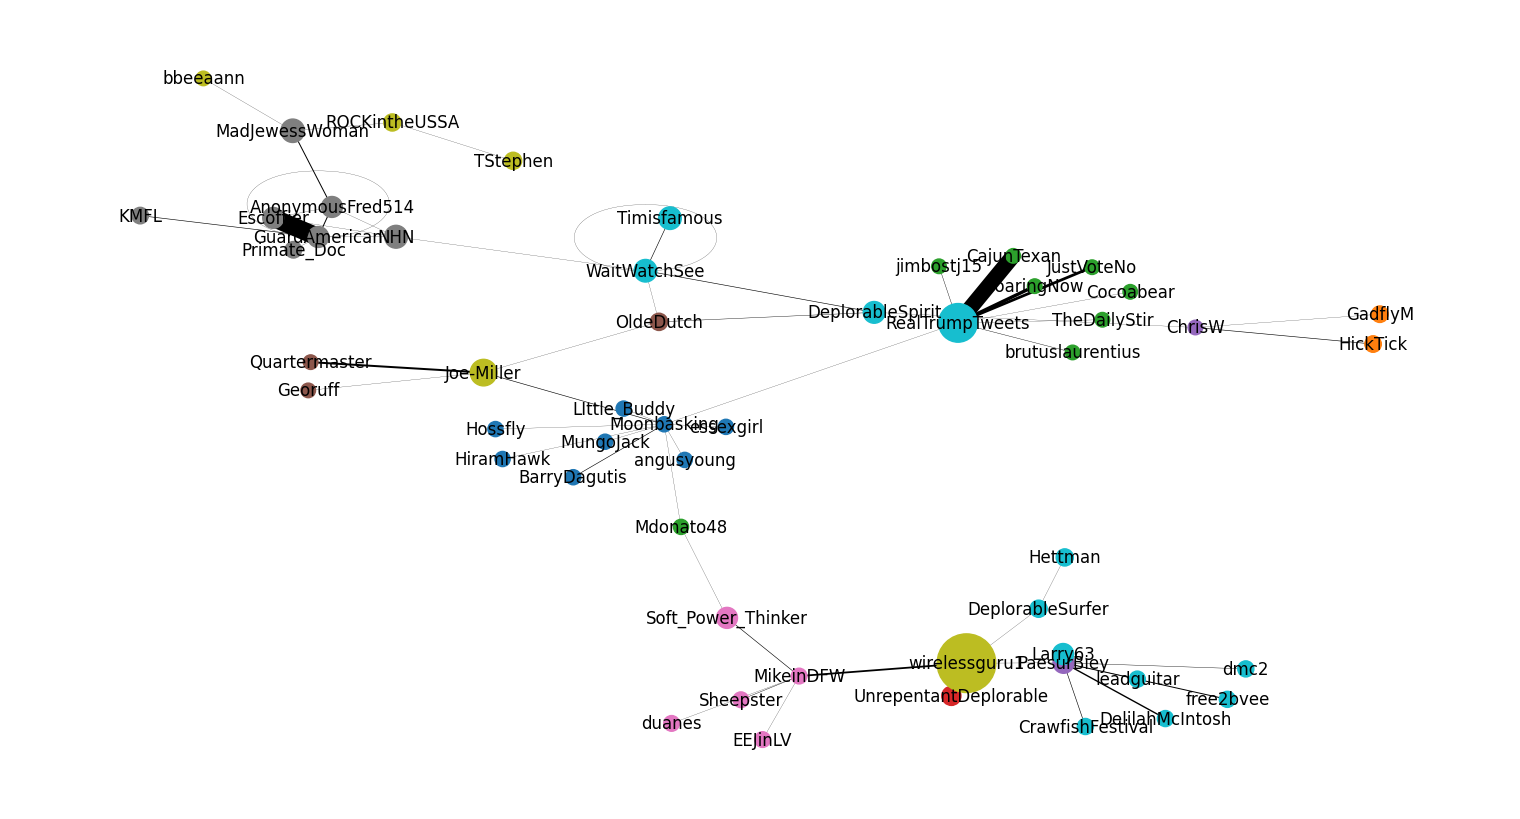

In [18]:
# Con tamaño ancho de ejes variables dependiendo del peso de la conección
nx.draw_spring(
    G,
    with_labels=True,
    nodelist=list(nodos['id']),
    node_size=list(nodos['pagerank'] * 200),
    node_color=list(nodos['community']),
    cmap='tab10',
    width=list(ejes['weight'] / 7)
)

# Gephi

Herramienta para visualizar redes de grafos y tener diferentes propiedades que imponen de forma profesional.
[gephi](https://gephi.org/)